In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [9]:
Data_file = pd.read_csv("heart_failure_clinical_records_dataset.csv")
Data_file

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [10]:
X = Data_file.drop(columns=["DEATH_EVENT"])
Y = Data_file['DEATH_EVENT']
Y


0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
prediciton = model.predict(X_test)


scorede = accuracy_score(Y_test, prediciton)
scorede

0.85

In [41]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores1 = cross_val_score(model, X_train, Y_train, cv=5)
scores1 = np.average(scores1)
scores1

0.7949468085106383

In [13]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train , Y_train)
prediction2 = model2.predict(X_test)

score2 = accuracy_score(Y_test, prediction2)
score2



0.7

In [14]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores3 = cross_val_score(model2, X_train, Y_train, cv=5)
scores3 = np.average(scores3)
scores3

C:\Users\GEHAD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\GEHAD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8289893617021276

In [15]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

y_pred=clf.predict(X_test)
score4 = accuracy_score(Y_test , y_pred)
score4

0.7833333333333333

In [16]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores5 = cross_val_score(clf, X_train, Y_train, cv=5)
scores5 = np.average(scores3)
scores5

0.8289893617021276

In [17]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train , Y_train)
Pred6 = svm_model.predict(X_test) 
score6 = accuracy_score(Y_test , y_pred)
score6

0.7833333333333333

In [18]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores7= cross_val_score(svm_model, X_train, Y_train, cv=5)
scores7= np.average(scores3)
scores7

0.8289893617021276

In [19]:
print ("Decision Tree Classifier = ", score , ", average cross validation score   = "  , scores1)
print ("Logistic Regression = "     , score2 , ", average cross validation score   = " , scores3)
print ("Random Forest Classifier = ", score4 , ", average cross validation score   = " , scores5)
print ("Support Vector Machine  = " , score6 , ", average cross validation score   = " , scores7)


Decision Tree Classifier =  0.7333333333333333 , average cross validation score   =  0.7992021276595744
Logistic Regression =  0.7 , average cross validation score   =  0.8289893617021276
Random Forest Classifier =  0.7833333333333333 , average cross validation score   =  0.8289893617021276
Support Vector Machine  =  0.7833333333333333 , average cross validation score   =  0.8289893617021276


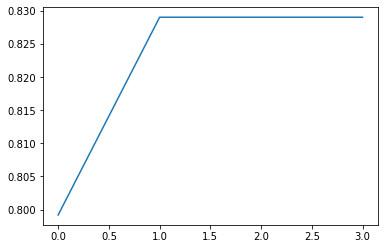

In [20]:
import matplotlib.pyplot as plt

l = [scores1 ,scores3, scores5, scores7 ]
plt.plot(l)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
data =[scores1 ,scores3, scores5, scores7]
data

[0.7992021276595744,
 0.8289893617021276,
 0.8289893617021276,
 0.8289893617021276]

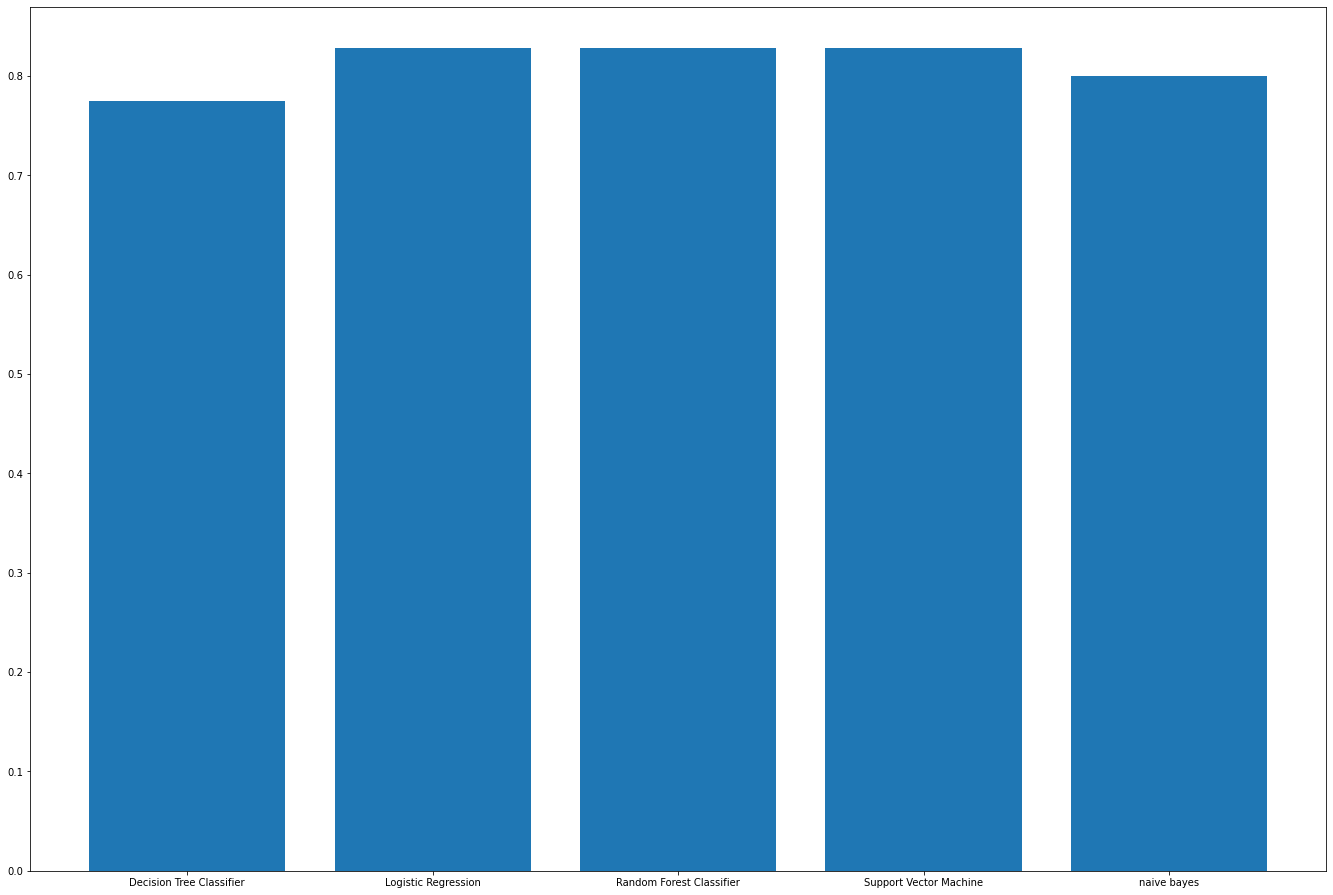

In [46]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([3,3,3,3])
langs = ['Decision Tree Classifier', 'Logistic Regression', 'Random Forest Classifier', 'Support Vector Machine', 'naive bayes']
numer  = [0.7742907801418439,0.8281028368794325,0.8281028368794325,0.8281028368794325, 0.8 ]
ax.bar(langs,numer)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

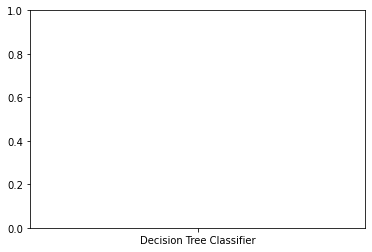

In [48]:
plt.plot(langs,l)

In [24]:
i

NameError: name 'i' is not defined

In [37]:
score000  = ['Decision Tree Classifier', 'Logistic Regression', 'Random Forest Classifier', 'Support Vector Machine']
position = [0.7742907801418439,0.8281028368794325,0.8281028368794325,0.8281028368794325] 

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

NameError: name 'time' is not defined

ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

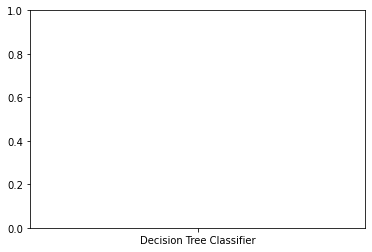

In [50]:
score999  = ['Decision Tree Classifier', 'Logistic Regression', 'Random Forest Classifier', 'Support Vector Machine', 'naive bayes']
position = [0.7742907801418439,0.8281028368794325,0.8281028368794325,0.8281028368794325, 0.8 ] 

plt.plot(score, position)
plt.title("Simple Line Plot")
plt.xlabel('modles')
plt.ylabel('accuracy ')

ValueError: Unrecognized character A in format string

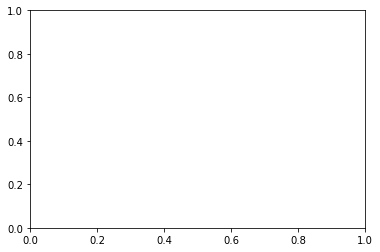

In [27]:
import matplotlib.pyplot as plt
ax = plt.plot("Modles", "Accuarcy ", kind='scatter', color = 'red', title = 'average accuracy of the models')
ax.set(ylabel='Accuarcy', xlabel = 'Models ', xticks = score)
plt.show()

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
naive_bayes = GaussianNB()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
naive_bayes.fit(X_train , Y_train)
pred8= naive_bayes.predict(X_test)  
score8 = accuracy_score(Y_test , pred8)
score8





0.8

In [31]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores9= cross_val_score(naive_bayes, X_train, Y_train, cv=5)
scores9= np.average(score8)
scores9

0.8

In [43]:
print ("Decision Tree Classifier = ", scorede , ", average cross validation score   = "  , scores1)
print ("Logistic Regression = "     , score2 , ", average cross validation score   = " , scores3)
print ("Random Forest Classifier = ", score4 , ", average cross validation score   = " , scores5)
print ("Support Vector Machine  = " , score6 , ", average cross validation score   = " , scores7)
print ("naive bayes  = " , score8 , ", average cross validation score   = " , scores9)


Decision Tree Classifier =  0.85 , average cross validation score   =  0.7949468085106383
Logistic Regression =  0.7 , average cross validation score   =  0.8289893617021276
Random Forest Classifier =  0.7833333333333333 , average cross validation score   =  0.8289893617021276
Support Vector Machine  =  0.7833333333333333 , average cross validation score   =  0.8289893617021276
naive bayes  =  0.8 , average cross validation score   =  0.8
